# CMSE 802 In-class assignment: 2D Navier-Stokes equation
## Date: 09/28/2018
## Due: 09/28/2018; 10:30PM

### The goal of this assignment is to simulate a simple 2D fluid mechanics problem using the Navier-Stokes equation. We will write several subroutines (Python functions) for implement the simulations.

---
### Your name: Boyao Zhu

---
### Two-dimensional Navier-Stokes equation
The Navier-Stokes equations for an incompressible fluid are 
\begin{eqnarray}
\nabla \cdot\vec{v} &=& 0\\\
\frac{\partial \vec{v}}{\partial t}+(\vec{v}\cdot\nabla)\vec{v} &=& -\frac{1}{\rho}\nabla p + \nu \nabla^2\vec{v}
\end{eqnarray}
where $\vec{v}=(u,v)$ is the velocity field. The first equation represents volume  conservation (equivalently mass conservation for constant density). The second equation is the conservation of momentum (force balance). By taking a divergence of the second equation and using the volume conservation condition, we can obtain a Poisson's equation of the pressure field. Thus, the Navier-Stokes equations become

\begin{align}
\frac{\partial u}{\partial t}+u\frac{\partial u}{\partial x}+v\frac{\partial u}{\partial y} &= -\frac{1}{\rho}\frac{\partial p}{\partial x}+\nu \left(\frac{\partial^2 u}{\partial x^2}+\frac{\partial^2 u}{\partial y^2} \right)\\
\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y} &= -\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)\\
\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} & = -\rho\left(\frac{\partial u}{\partial x}\frac{\partial u}{\partial x}+2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}+\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)
\end{align}

**You may notice that there are advenction terms on the left-hand side of the equations for u and v, and Laplace operators on the right-hand side. **

So far, we have learned how to calculate advection terms, Laplace operators, and solving Poisson's equation using finite difference method. **In this assginment, we will build several Python functions for simulating cavity flow by solving the 2D Navier-Stokes equation. The functions include**

**(1) Calculate advenction terms using first-order upwind scheme:**

$$u \frac{\partial u}{\partial x} = u_{i,j} \frac{u_{i,j} - u_{i,j-1}}{\Delta x} ~~\text{for}~~ u_{i,j} > 0$$

$$u \frac{\partial u}{\partial x} = u_{i,j} \frac{u_{i,j+1} - u_{i,j}}{\Delta x} ~~\text{for}~~ u_{i,j} < 0$$


**(2) Calculate first derivaitve using central differencing scheme:**

$$\frac{\partial p}{\partial x} = \frac{p_{i,j+1} - p_{i,j-1} }{2\Delta x} ~~~~\text{and}~~~~ \frac{\partial p}{\partial y} = \frac{p_{i+1,j} - p_{i-1,j} }{2\Delta y}$$

**(3) Calculate Laplace using central differencing scheme:**

$$\frac{\partial^2 u}{\partial x^2} + \frac{\partial^2 u}{\partial y^2} = \frac{u_{i,j-1} - 2 u_{i,j} + u_{i,j+1}}{\Delta x^2} + \frac{u_{i-1,j} - 2 u_{i,j} + u_{i+1,j}}{\Delta y^2}$$

**(4) Calculate the right-hand side of the Poisson's equation for pressure field: **

$$b_{i,j}^n = \rho \bigg[ \frac{1}{\Delta t} \left( \frac{u^n_{i,j+1}-u^n_{i,j-1}}{2\Delta x}+\frac{v^n_{i+1,j}-v^n_{i-1,j}}{2\Delta y}\right)  - \bigg( \frac{u^n_{i,j+1}-u^n_{i,j-1}}{2\Delta x} \bigg)^2 - 2\frac{u^n_{i+1,j}-u^n_{i-1,j}}{2\Delta y}\cdot \frac{v^n_{i,j+1}-v^n_{i,j-1}}{2\Delta x}
- \bigg( \frac{v^n_{i+1,j}-v^n_{i-1,j}}{2\Delta y} \bigg)^2 \bigg]$$

**(5) Solve the Poisson's equation for pressure field using point-wise relaxation method: **

$$p_{i,j}^{n+1} = \frac{ - \Delta x^2 \Delta y^2 b_{i,j}^n + \Delta y^2 ( p_{i,j-1}^n + p_{i,j+1}^n ) + \Delta x^2 ( p_{i-1,j}^n + p_{i+1,j}^n )}{2 (\Delta x^2 + \Delta y^2 )}  $$

**Note that we have defined that the first and second indices for the grid points are for the y and x directions, respectively, in the discretization. **


### Boundary condition: 

$$ u = 1 ~~~~\text{at}~~~~ y=2 ~~~~\text{(the "lid")} $$

$$ u  = 0 ~~~~\text{on the remaining three boundaries}$$

$$ v  = 0 ~~~~\text{on all boundaries}$$

$${\partial p\over\partial x} =0~~~~\text{at}~~~~ x=0,2$$

$${\partial p\over\partial y} =0 ~~~~\text{at}~~~~y=0$$

$$ p = 0 ~~~~\text{at}~~~~y=2 $$

$$~~$$
$$~~$$

<img src="Cavity_13.png" alt = "drawing" width=400 align="center"/>


### Go to the main code at the last code cell, and see what functions are needed. Complete those functions make your simulation run.

In [9]:
import numpy as np

In [10]:
# #######################################
# function for calculating advection term
# #######################################

def SelfAdvect_2d(nx,ny,dx,dy,u,v,vel):

    Cnvc_x = np.zeros((ny,nx))
    Cnvc_y = np.zeros((ny,nx))
    Cnvc_2d = np.zeros((ny,nx))
    
    
    for n in range(1,ny-1):
        for m in range(1,nx-1):
            
            if u[n,m] > 0:
                Cnvc_x[n,m] = u[n,m]*(vel[n,m]-vel[n,m-1])/dx     # <== fill the blank
            else:
                Cnvc_x[n,m] = u[n,m]*(vel[n,m+1]-vel[n,m])/dx     # <== fill the blank
                
            if v[n,m] > 0:
                Cnvc_y[n,m] = v[n,m]*(vel[n,m]-vel[n,m-1])/dy     # <== fill the blank
            else:
                Cnvc_y[n,m] = v[n,m]*(vel[n,m+1]-vel[n,m])/dy     # <== fill the blank
                
    Cnvc_2d[1:ny-1,1:nx-1] = Cnvc_x[1:ny-1,1:nx-1] + Cnvc_y[1:ny-1,1:nx-1]         

    return Cnvc_2d

In [11]:
# #######################################
# function for calculating first derivative
# #######################################

def FstDeriv(nx,ny,dx,dy,f):

    df_dx = np.zeros((ny,nx))
    df_dy = np.zeros((ny,nx))
    
    df_dx[1:ny-1,1:nx-1] = (f[1:ny-1,2:nx]-f[1:ny-1,0:nx-2])/(2*dy)     # <== fill the blank
    df_dy[1:ny-1,1:nx-1] = (f[2:ny,1:nx-1]-f[0:ny-2,1:nx-1])/(2*dx)     # <== fill the blank
    
    return df_dx, df_dy

In [12]:
# #######################################
# function for calculating Laplace
# #######################################

def Laplace_2d(nx,ny,dx,dy,f):
    
    # complete the code
    Lap = np.zeros((ny,nx))
    
    Lap[1:ny-1,1:nx-1] = (f[1:ny-1,0:nx-2] - 2*f[1:ny-1,1:nx-1] + f[1:ny-1,2:nx])/dy**2 + \
                         (f[0:ny-2,1:nx-1] - 2*f[1:ny-1,1:nx-1] + f[2:ny,1:nx-1])/dx**2

    return Lap

In [13]:
# #######################################
# function for calculating b
# #######################################

def RHS_b(rho,dt,nx,ny,dx,dy,u,v):
     
    # complete the code
    du_dx,du_dy = FstDeriv(ny,nx,dy,dx,u)
    dv_dx,dv_dy = FstDeriv(ny,nx,dy,dx,v)
    
    b = rho*( (du_dx + dv_dy)/dt - du_dx**2 - 2*du_dy*dv_dx - dv_dy**2 ) 
    
    return b

In [14]:
# #######################################
# function for solving Poisson's equation
# #######################################

def PoissonEqn_2d(nx,ny,dx,dy,b,p,norm_target):
    
    resd = np.zeros((ny,nx))
    tmp = np.zeros((ny,nx))
    sol = np.zeros((ny,nx))
    
    cnt = 0
    nrm = 1.0
    while nrm > norm_target:
        
        # point-wise relaxation
        p[1:ny-1,1:nx-1] = (-(dx**2)*(dy**2)*b[1:ny-1,1:nx-1]+dx**2*(p[1:ny-1,0:nx-2] + \
                           p[1:ny-1,2:nx])+dy**2*(p[0:ny-2,1:nx-1]+p[2:ny,1:nx-1])) \
                           /(2*(dx**2+dy**2))# <== fill the blank
            
        # boundary condition for pressure
        p[1:ny-1,0]    = p[1:ny-1,1]         # at x = 0
        p[1:ny-1,nx-1] = p[1:ny-1,nx-2]         # at x = 2
        p[0,1:nx-1]    = p[1,1:nx-1]         # at y = 0
        p[ny-1,1:nx-1]    = 0        # at y = 2
        
        
        # residual
        tmp = Laplace_2d(nx,ny,dx,dy,p)
        resd[1:ny-1,1:nx-1] = tmp[1:ny-1,1:nx-1] - b[1:ny-1,1:nx-1]
        nrm = np.linalg.norm(resd[1:ny-1,1:nx-1])
        
        cnt = cnt + 1
    
    sol = p

    return sol, cnt

In [15]:
# #######################################
# function for plotting results
# #######################################

def plot2D(tm, xmsh, ymsh, u, v, p):
    
    clear_output(wait=True) # Clear output for dynamic display
    
    fig = plt.figure(figsize=(8, 8), dpi=100)
    plt.contourf(xmsh, ymsh, p, 40, cmap=cm.jet)
    plt.colorbar()

    plt.quiver(xmsh[::2, ::2], ymsh[::2, ::2], u[::2, ::2], v[::2, ::2], color='k')
    plt.axes().set_aspect('equal')

    plt.xlabel('X')
    plt.ylabel('Y')
    
    plt.show()
    print('time = ', tm)
    time.sleep(0.02)

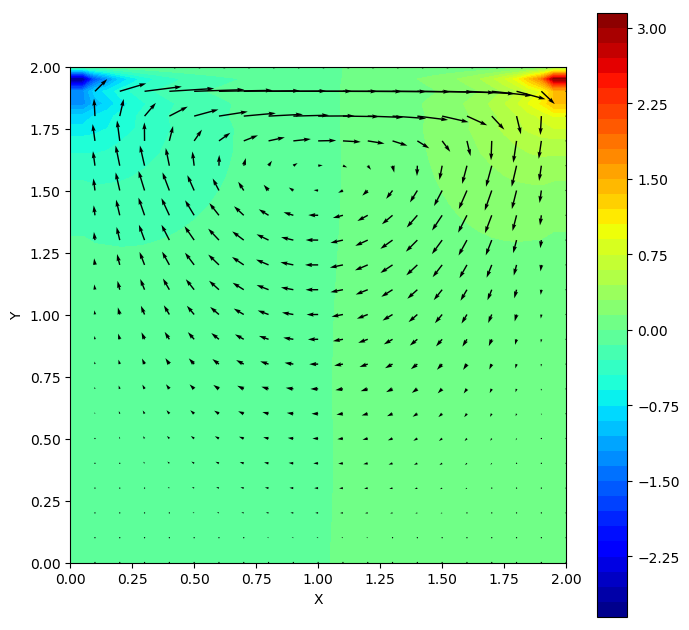

time =  0.7970000000000006


In [16]:
# ###################################
# main code
# ###################################

import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import display, clear_output

import time 

# discretization
nx = 41
ny = 41

Xg = np.linspace(0,2,nx)
dx = Xg[2] - Xg[1]

Yg = np.linspace(0,2,ny)
dy = Yg[2] - Yg[1]

# create meshgrid (x and y coordinate of grid points in the 2D grid system) 
xmsh, ymsh = np.meshgrid(Yg, Xg)

# parameters
rho = 1.0
nu = 0.1
dt = 0.001
tm = 0.0

# arrays for storing data
u = np.zeros((ny,nx))
v = np.zeros((ny,nx))
b = np.zeros((ny,nx))
p = np.zeros((ny,nx))

adv_u = np.zeros((ny,nx))
adv_v = np.zeros((ny,nx))
dp_dx = np.zeros((ny,nx))
dp_dy = np.zeros((ny,nx))

Lap_u = np.zeros((ny,nx))
Lap_v = np.zeros((ny,nx))


# time iterations
for iter in range(800):

    # calculate the left-hand side of Poisson's equation for pressure field
    b = RHS_b(rho,dt,nx,ny,dx,dy,u,v)
    p, cnt = PoissonEqn_2d(nx,ny,dx,dy,b,p,0.001)
    
    # calculate advection terms
    adv_u = SelfAdvect_2d(nx,ny,dx,dy,u,v,u)
    adv_v = SelfAdvect_2d(nx,ny,dx,dy,u,v,v)
    
    # calculate the Laplace of velocity
    Lap_u = Laplace_2d(nx,ny,dx,dy,u)
    Lap_v = Laplace_2d(nx,ny,dx,dy,v)
    
    # calculate the first derivative of pressure field
    dp_dx, dp_dy = FstDeriv(nx,ny,dx,dy,p)
    
    # update velocity
    u[1:ny-1,1:nx-1] = u[1:ny-1,1:nx-1] + dt*( -adv_u[1:ny-1,1:nx-1] - dp_dx[1:ny-1,1:nx-1]/rho + \
                        nu*Lap_u[1:ny-1,1:nx-1] )

    v[1:ny-1,1:nx-1] = v[1:ny-1,1:nx-1] + dt*( -adv_v[1:ny-1,1:nx-1] - dp_dy[1:ny-1,1:nx-1]/rho + \
                        nu*Lap_v[1:ny-1,1:nx-1] )
    
    
    # boundary condition for u and v
    u[1:ny-1,0] = 0.0              # at x = 0
    u[1:ny-1,nx-1] = 0.0           # at x = 2
    u[0,1:nx-1] = 0.0              # at y = 0
    u[ny-1,1:nx-1:] = 1.0           # at y = 2 
    
    
    v[1:ny-1,0] = 0.0              # at x = 0
    v[1:ny-1,nx-1] = 0.0           # at x = 2
    v[0,1:nx-1] = 0.0              # at y = 0
    v[ny-1,1:nx-1] = 0.0           # at y = 2
    
    
    # update time
    tm = tm + dt
    
    # plotting results
    if iter%5 == 1:
        plot2D(tm, xmsh, ymsh, u, v, p)

        
# fig = plt.figure(figsize=(11, 7), dpi=100)
# ax = fig.gca(projection='3d')
# ax.plot_surface(xmsh,ymsh, p,  cmap=cm.jet)
# ax.set_xlabel('x')
# ax.set_ylabel('y')
# ax.view_init(30, -60)
# plt.show()